# Logistic regression

In [26]:
run_logi = run_logistic(df_boot, data, SEEDS)

100%|█████████████████████████████████████| 570/570 [00:00<00:00, 257485.54it/s]

train: 456 test: 114


[array([0.80434783, 0.86956522, 0.76086957, 0.82608696, 0.89130435,
       0.80434783, 0.84444444, 0.8       , 0.86666667, 0.73333333])]
predicted class  Femme  Homme
actual class                 
Femme               50     11
Homme                9     44
accuracy test (r2) = 0.8245614035087719
accuracy train (r2) = 0.9342105263157895


In [33]:
study_dir_logi = Path('/data/brambati/dataset/HCP/derivatives/training_sex_diff/results/LogisticRegression')
results_path_all_seed_logi = study_dir_logi / "models_iteration-10000_seeds-all_mean_LogisticRegression.pkl"
results_path_aMTG_L_logi = study_dir_logi / "models_iteration-10000_seeds-aMTG_L_mean_LogisticRegression.pkl"
results_path_aMTG_R_logi = study_dir_logi / "models_iteration-10000_seeds-aMTG_R_mean_LogisticRegression.pkl"
results_path_opIFG_L_logi = study_dir_logi / "models_iteration-10000_seeds-opIFG_L_mean_LogisticRegression.pkl"
results_path_opIFG_R_logi = study_dir_logi / "models_iteration-10000_seeds-opIFG_R_mean_LogisticRegression.pkl"
results_path_pITG_L_logi = study_dir_logi / "models_iteration-10000_seeds-pITG_L_mean_LogisticRegression.pkl"
results_path_pITG_R_logi = study_dir_logi / "models_iteration-10000_seeds-pITG_R_mean_LogisticRegression.pkl"
results_path_planumtemp_L_logi = study_dir_logi / "models_iteration-10000_seeds-planumtemp_L_mean_LogisticRegression.pkl"
results_path_planumtemp_R_logi = study_dir_logi / "models_iteration-10000_seeds-planumtemp_R_mean_LogisticRegression.pkl"
results_path_all_left_logi = study_dir_logi / "models_iteration-10000_seeds-left_mean_LogisticRegression.pkl"
results_path_all_right_logi = study_dir_logi / "models_iteration-10000_seeds-right_mean_LogisticRegression.pkl"



results_logistic = joblib.load(results_path_all_seed_logi)

coefs_logi = []
for result in results_logistic:
    coefs_logi.append(result["model"].coef_[0])

coefs_logi = np.array(coefs_logi)

data_results_logi = pd.DataFrame.from_dict(results_logistic)
moyenne_logi, scoresZ_logi, pvalue_logi, pvalue_bonf_logi = bootstrap_scores(coefs_logi)
moyenne_logi.shape

/data/brambati/local/venvs/lingualab_workstation/lib/python3.8/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


(1184,)

# Best region with bootstrap results from the logistic regression

## Best region for all seed

     coefficient     seed                      labels
394     0.098958   aMTG_L      R G_pariet_inf-Angular
349     0.080731   aMTG_L               L S_front_sup
300     0.073284   aMTG_L  L G_and_S_transv_frontopol
453     0.072561   pITG_L     L G_cingul-Post-ventral
431     0.069487   aMTG_L         R S_orbital_lateral
41      0.067807  opIFG_L            L Pole_occipital
588     0.065544   pITG_L             R S_subparietal
527     0.064567   pITG_L     R G_cingul-Post-ventral
448     0.062435   pITG_L  L G_and_S_transv_frontopol
941     0.061344   aMTG_R               L S_front_sup
The mean accuracy : 0.8771787610619469
The standard deviation of the accuracy : 0.03273918959293958
The lower boundry of the confidance interval of the accuracy : 0.8130099494597853
The upper boundry of the confidance interval of the accuracy : 0.9413475726641085


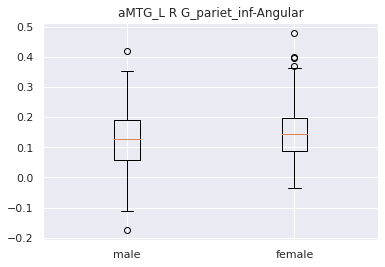

Ttest_indResult(statistic=-2.9146205621255152, pvalue=0.0037015700856202847)
male mean : 0.12457278
female mean : 0.1470128


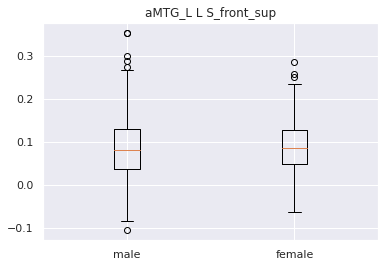

Ttest_indResult(statistic=-0.16306014602567942, pvalue=0.8705290755176053)
male mean : 0.08941226
female mean : 0.09030944


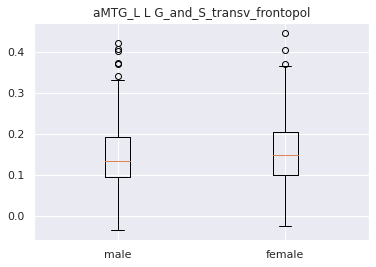

Ttest_indResult(statistic=-0.4347863501222379, pvalue=0.6638826498992696)
male mean : 0.15048955
female mean : 0.15334298


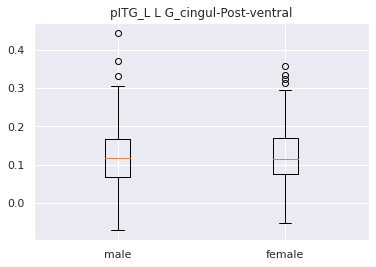

Ttest_indResult(statistic=0.0032246372189609824, pvalue=0.997428248397062)
male mean : 0.121866316
female mean : 0.121846415


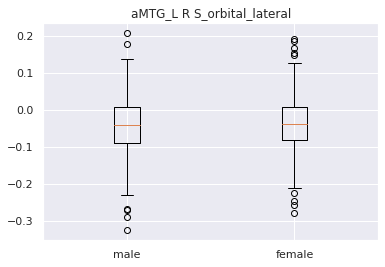

Ttest_indResult(statistic=-1.292465867685566, pvalue=0.1967213906190116)
male mean : -0.042981237
female mean : -0.034570992


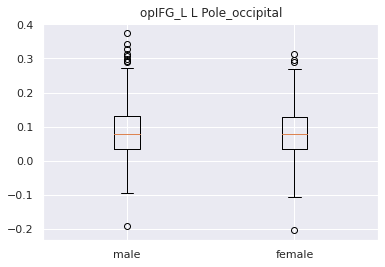

Ttest_indResult(statistic=1.0227015449858845, pvalue=0.30688434881270166)
male mean : 0.08923399
female mean : 0.08254886


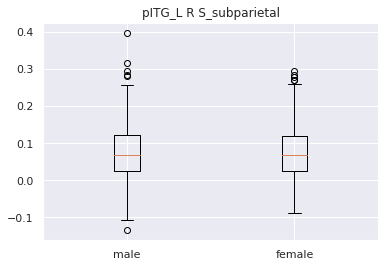

Ttest_indResult(statistic=0.773712472483331, pvalue=0.43942273577180035)
male mean : 0.07773077
female mean : 0.072799556


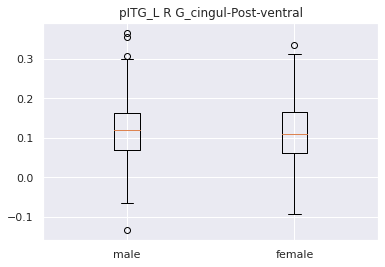

Ttest_indResult(statistic=0.09601695482038536, pvalue=0.9235409730092512)
male mean : 0.11851825
female mean : 0.11792118


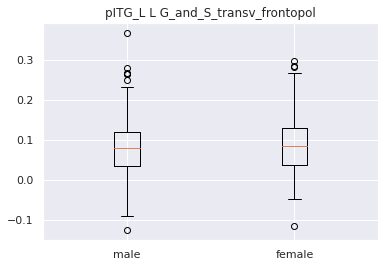

Ttest_indResult(statistic=-0.7998487955908873, pvalue=0.42413278500505813)
male mean : 0.083293684
female mean : 0.08794802


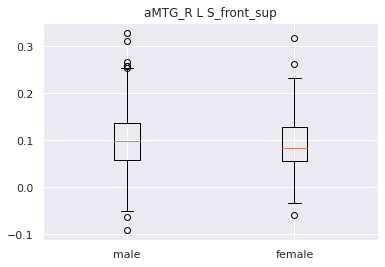

Ttest_indResult(statistic=1.3124199191098709, pvalue=0.1899085676690528)
male mean : 0.09976947
female mean : 0.0929379


In [34]:
rois = ["opIFG_L", "planumtemp_L", "aMTG_L", "pITG_L", "opIFG_R", "planumtemp_R", "aMTG_R", "pITG_R"] # modified to rois of interest
ROIs = regionsOfInterest(data_results_logi["acc_test"], pvalue_logi, moyenne_logi, rois, label, run_logi)
bestRegion(ROIs)

## Best region for aMTG_L

     coefficient    seed                       labels
98      0.159713  aMTG_L       R G_pariet_inf-Angular
78      0.123802  aMTG_L   R G_and_S_transv_frontopol
53      0.117089  aMTG_L                L S_front_sup
4       0.115613  aMTG_L   L G_and_S_transv_frontopol
135     0.098832  aMTG_L          R S_orbital_lateral
112     0.094689  aMTG_L       R Lat_Fis-ant-Horizont
128     0.091343  aMTG_L       R S_interm_prim-Jensen
127     0.082504  aMTG_L                R S_front_sup
55      0.080874  aMTG_L  L S_intrapariet_and_P_trans
74      0.074990  aMTG_L       R G_and_S_frontomargin
The mean accuracy : 0.7447690265486725
The standard deviation of the accuracy : 0.04195740392617605
The lower boundry of the confidance interval of the accuracy : 0.6625325148533674
The upper boundry of the confidance interval of the accuracy : 0.8270055382439776


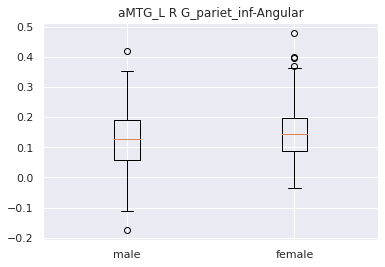

Ttest_indResult(statistic=-2.9146205621255152, pvalue=0.0037015700856202847)
male mean : 0.12457278
female mean : 0.1470128


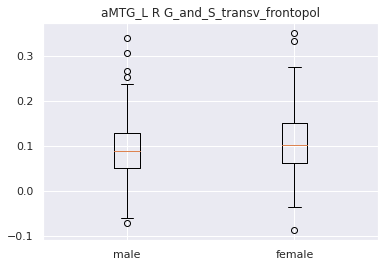

Ttest_indResult(statistic=-2.571148551614975, pvalue=0.010389553654298302)
male mean : 0.09560566
female mean : 0.10965275


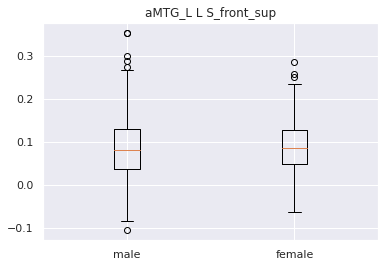

Ttest_indResult(statistic=-0.16306014602567942, pvalue=0.8705290755176053)
male mean : 0.08941226
female mean : 0.09030944


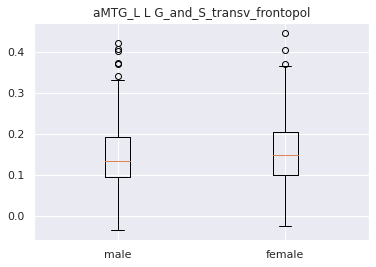

Ttest_indResult(statistic=-0.4347863501222379, pvalue=0.6638826498992696)
male mean : 0.15048955
female mean : 0.15334298


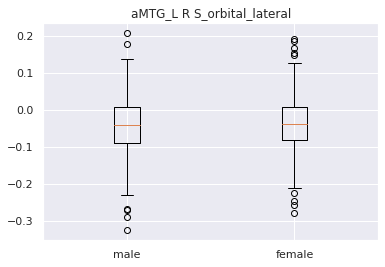

Ttest_indResult(statistic=-1.292465867685566, pvalue=0.1967213906190116)
male mean : -0.042981237
female mean : -0.034570992


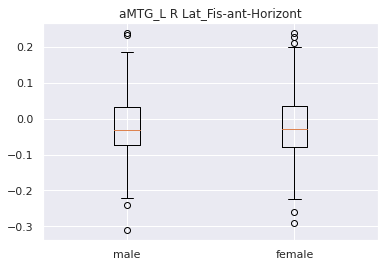

Ttest_indResult(statistic=0.12007247790545271, pvalue=0.9044681925613891)
male mean : -0.022705056
female mean : -0.023588676


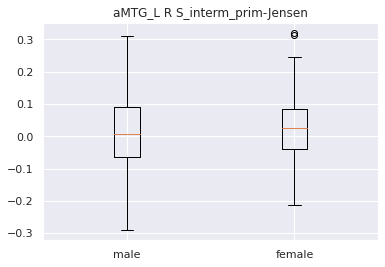

Ttest_indResult(statistic=-1.5294954489961272, pvalue=0.12669836271753415)
male mean : 0.012375309
female mean : 0.025751121


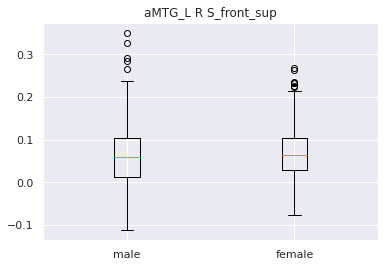

Ttest_indResult(statistic=-1.1389318472140917, pvalue=0.2552116921929824)
male mean : 0.064714245
female mean : 0.07098976


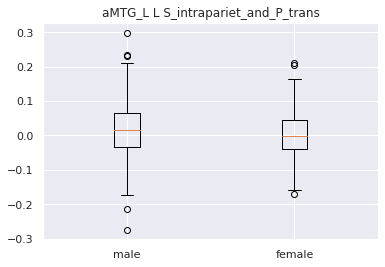

Ttest_indResult(statistic=1.5534617198947105, pvalue=0.1208698513554686)
male mean : 0.014690557
female mean : 0.005323266


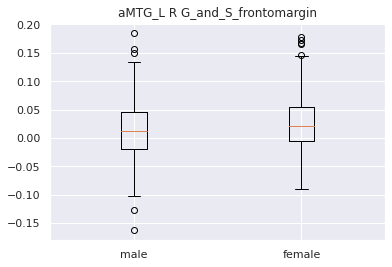

Ttest_indResult(statistic=-2.654234234179124, pvalue=0.008171609968845658)
male mean : 0.015130943
female mean : 0.02619883


In [147]:
rois = ["aMTG_L"] # modified to rois of interest
ROIs = regionsOfInterest(data_results_logi["acc_test"], pvalue_logi, moyenne_logi, rois, label, run_logi)
bestRegion(ROIs)

## Best region for aMTG_R

     coefficient    seed                      labels
78      0.106263  aMTG_R  R G_and_S_transv_frontopol
4       0.098402  aMTG_R  L G_and_S_transv_frontopol
98      0.095679  aMTG_R      R G_pariet_inf-Angular
53      0.095088  aMTG_R               L S_front_sup
127     0.089575  aMTG_R               R S_front_sup
135     0.087780  aMTG_R         R S_orbital_lateral
64      0.072560  aMTG_R       L S_parieto_occipital
103     0.069086  aMTG_R               R G_precuneus
112     0.068785  aMTG_R      R Lat_Fis-ant-Horizont
66      0.067331  aMTG_R             L S_postcentral
The mean accuracy : 0.7241982300884955
The standard deviation of the accuracy : 0.04333896457122303
The lower boundry of the confidance interval of the accuracy : 0.6392538595288983
The upper boundry of the confidance interval of the accuracy : 0.8091426006480926


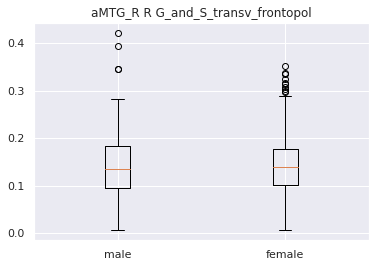

Ttest_indResult(statistic=-0.5021313679136576, pvalue=0.615769711298541)
male mean : 0.14287779
female mean : 0.14569084


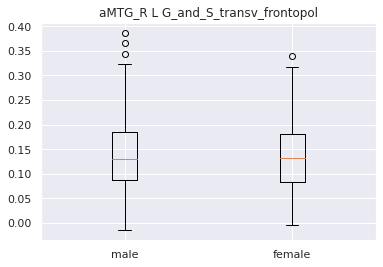

Ttest_indResult(statistic=0.6162901616659396, pvalue=0.5379499355179367)
male mean : 0.14077756
female mean : 0.13714556


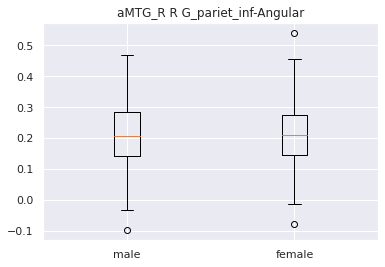

Ttest_indResult(statistic=0.3243155515075406, pvalue=0.7458185428544883)
male mean : 0.21665388
female mean : 0.21397533


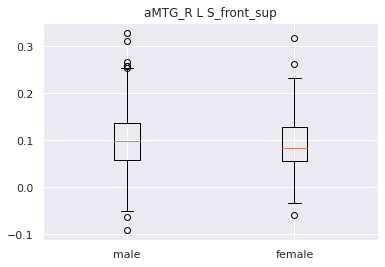

Ttest_indResult(statistic=1.3124199191098709, pvalue=0.1899085676690528)
male mean : 0.09976947
female mean : 0.0929379


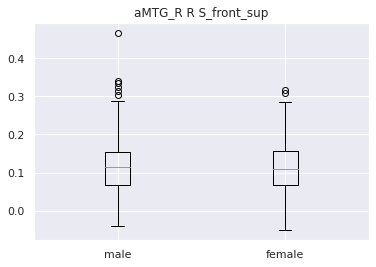

Ttest_indResult(statistic=0.35699531800332124, pvalue=0.7212279003781157)
male mean : 0.116820656
female mean : 0.11475391


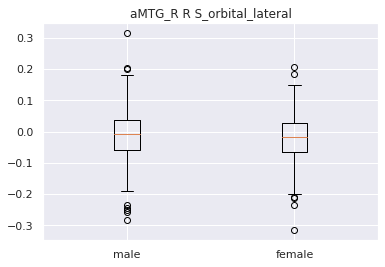

Ttest_indResult(statistic=0.8920637158306071, pvalue=0.37273653091063785)
male mean : -0.010003094
female mean : -0.016048837


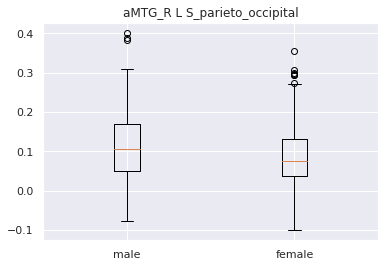

Ttest_indResult(statistic=3.5472737596042614, pvalue=0.0004213927704471286)
male mean : 0.112914845
female mean : 0.08894315


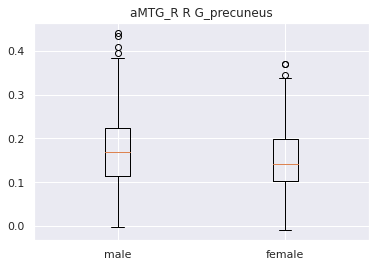

Ttest_indResult(statistic=3.145357117857211, pvalue=0.001745610206025575)
male mean : 0.17314157
female mean : 0.15322492


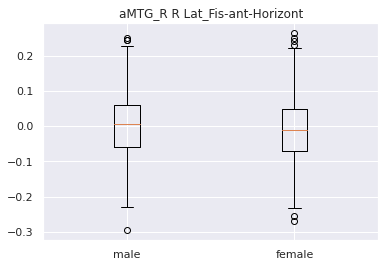

Ttest_indResult(statistic=2.1749926651334737, pvalue=0.030042475203811723)
male mean : 0.0059737926
female mean : -0.011033725


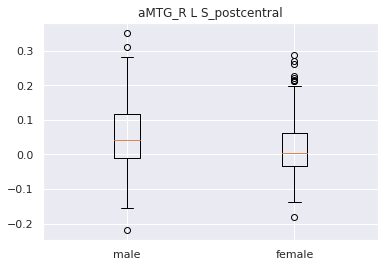

Ttest_indResult(statistic=4.322259791116856, pvalue=1.823637503842923e-05)
male mean : 0.04981075
female mean : 0.01834556


In [149]:
rois = ["aMTG_R"] # modified to rois of interest
ROIs = regionsOfInterest(data_results_logi["acc_test"], pvalue_logi, moyenne_logi, rois, label, run_logi)
bestRegion(ROIs)

## Best region for opIFG_L

     coefficient     seed                     labels
41      0.108705  opIFG_L           L Pole_occipital
1       0.077864  opIFG_L    L G_and_S_occipital_inf
20      0.074842  opIFG_L    L G_oc-temp_lat-fusifor
124     0.069782  opIFG_L     R S_collat_transv_post
50      0.068693  opIFG_L     L S_collat_transv_post
115     0.066168  opIFG_L           R Pole_occipital
56      0.062111  opIFG_L  L S_oc_middle_and_Lunatus
40      0.061862  opIFG_L             L Lat_Fis-post
21      0.061012  opIFG_L    L G_oc-temp_med-Lingual
43      0.060960  opIFG_L              L S_calcarine
The mean accuracy : 0.7548345132743363
The standard deviation of the accuracy : 0.04075594162983533
The lower boundry of the confidance interval of the accuracy : 0.6749528676798591
The upper boundry of the confidance interval of the accuracy : 0.8347161588688135


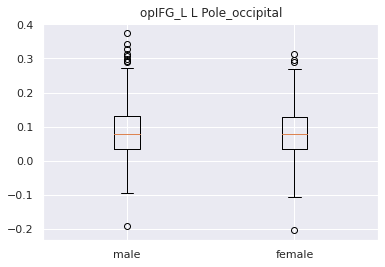

Ttest_indResult(statistic=1.0227015449858845, pvalue=0.30688434881270166)
male mean : 0.08923399
female mean : 0.08254886


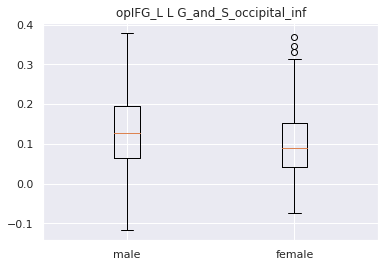

Ttest_indResult(statistic=4.290902217129095, pvalue=2.091808235930295e-05)
male mean : 0.13385779
female mean : 0.1019564


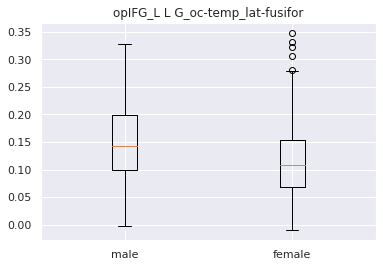

Ttest_indResult(statistic=5.8491198530470045, pvalue=8.347799493217066e-09)
male mean : 0.14884304
female mean : 0.116547726


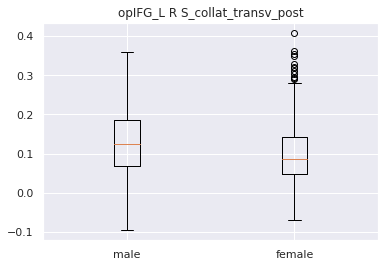

Ttest_indResult(statistic=4.2835846567255205, pvalue=2.159598690473479e-05)
male mean : 0.12967476
female mean : 0.099663146


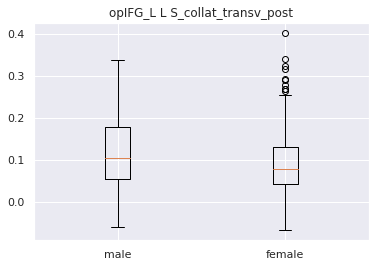

Ttest_indResult(statistic=4.270024840833031, pvalue=2.2907984017195004e-05)
male mean : 0.12016607
female mean : 0.09215127


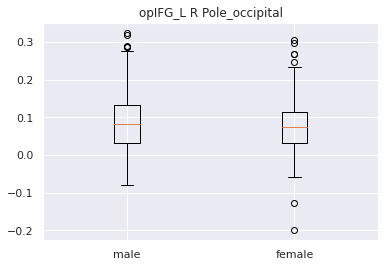

Ttest_indResult(statistic=1.7907080350361146, pvalue=0.07387255978359172)
male mean : 0.08912083
female mean : 0.07786428


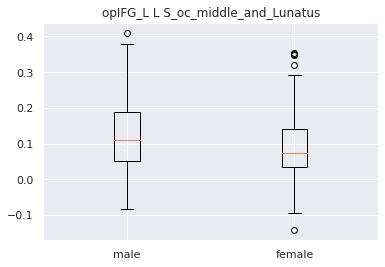

Ttest_indResult(statistic=3.9593194133662495, pvalue=8.470750162521169e-05)
male mean : 0.11901468
female mean : 0.08859685


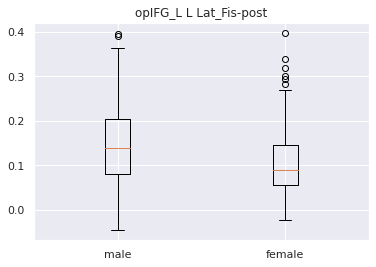

Ttest_indResult(statistic=6.364933392751482, pvalue=4.029331087681434e-10)
male mean : 0.14507884
female mean : 0.104537904


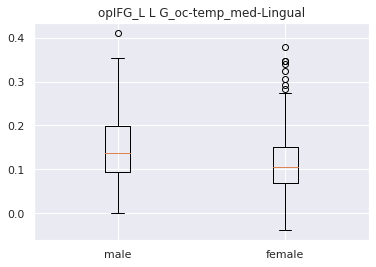

Ttest_indResult(statistic=5.321141269866611, pvalue=1.4862396535701113e-07)
male mean : 0.14772123
female mean : 0.11525328


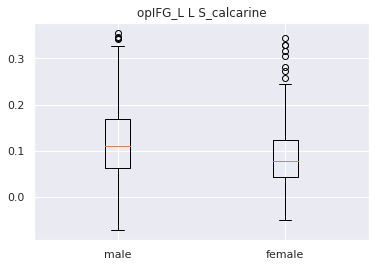

Ttest_indResult(statistic=4.997508247569585, pvalue=7.745382660488108e-07)
male mean : 0.12062381
female mean : 0.0899793


In [151]:
rois = ["opIFG_L"] # modified to rois of interest
ROIs = regionsOfInterest(data_results_logi["acc_test"], pvalue_logi, moyenne_logi, rois, label, run_logi)
bestRegion(ROIs)

## Best region for opIFG_R

     coefficient     seed                       labels
41      0.082350  opIFG_R             L Pole_occipital
125     0.079847  opIFG_R                R S_front_inf
43      0.078646  opIFG_R                L S_calcarine
60      0.075013  opIFG_R  L S_oc-temp_med_and_Lingual
20      0.074168  opIFG_R      L G_oc-temp_lat-fusifor
21      0.073179  opIFG_R      L G_oc-temp_med-Lingual
121     0.072690  opIFG_R      R S_circular_insula_inf
47      0.069182  opIFG_R      L S_circular_insula_inf
90      0.068517  opIFG_R    R G_Ins_lg_and_S_cent_ins
63      0.064658  opIFG_R         L S_orbital-H_Shaped
The mean accuracy : 0.748191150442478
The standard deviation of the accuracy : 0.04156195480724132
The lower boundry of the confidance interval of the accuracy : 0.666729719020285
The upper boundry of the confidance interval of the accuracy : 0.829652581864671


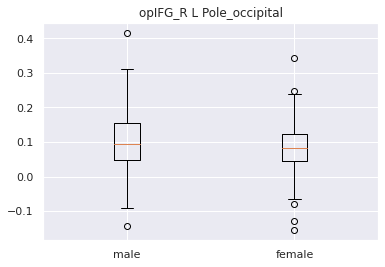

Ttest_indResult(statistic=2.8938857514023053, pvalue=0.0039511454822068635)
male mean : 0.104489796
female mean : 0.086915694


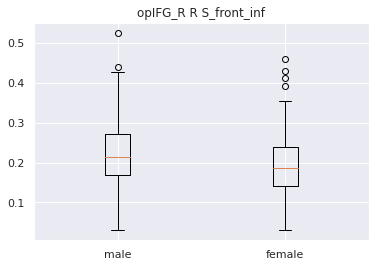

Ttest_indResult(statistic=5.115644829965803, pvalue=4.282989746232668e-07)
male mean : 0.2219755
female mean : 0.1895739


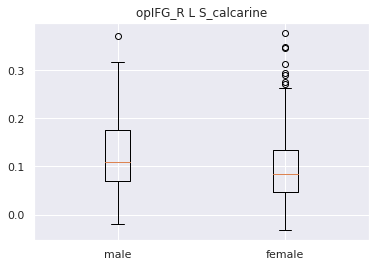

Ttest_indResult(statistic=4.630155240390032, pvalue=4.532821865417859e-06)
male mean : 0.12374703
female mean : 0.09596405


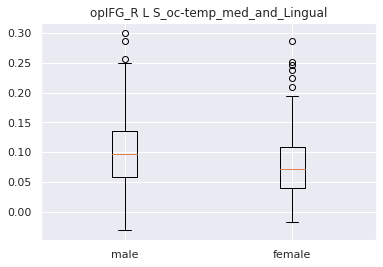

Ttest_indResult(statistic=4.827321505738625, pvalue=1.7812051723580022e-06)
male mean : 0.10082634
female mean : 0.07872187


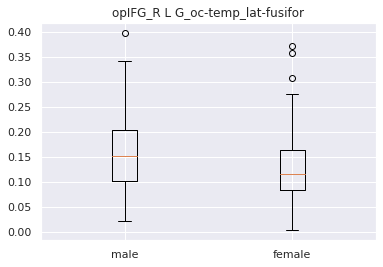

Ttest_indResult(statistic=5.732376818088248, pvalue=1.609202883985806e-08)
male mean : 0.1562101
female mean : 0.12528288


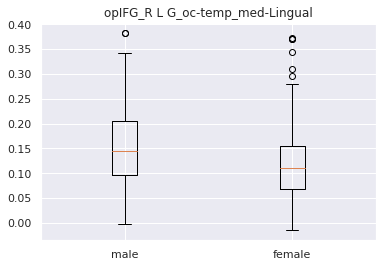

Ttest_indResult(statistic=5.3967280980247985, pvalue=9.980979286711935e-08)
male mean : 0.15296073
female mean : 0.12062115


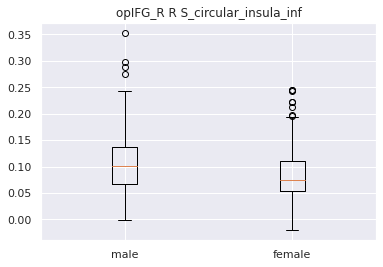

Ttest_indResult(statistic=5.226547983016146, pvalue=2.429845275450505e-07)
male mean : 0.10671159
female mean : 0.08417532


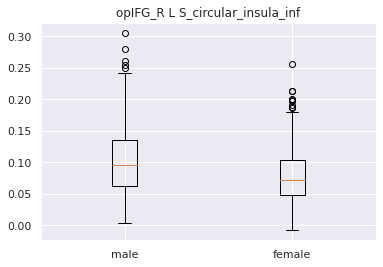

Ttest_indResult(statistic=5.209214471386057, pvalue=2.656732376950302e-07)
male mean : 0.10079068
female mean : 0.079217285


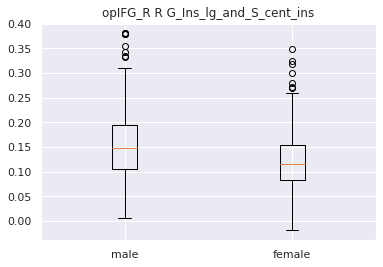

Ttest_indResult(statistic=5.739625655933474, pvalue=1.545440086293778e-08)
male mean : 0.15487437
female mean : 0.12380144


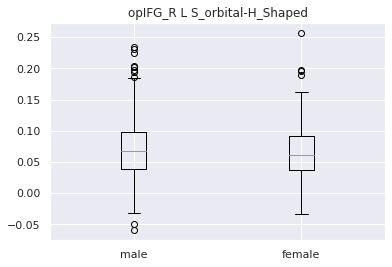

Ttest_indResult(statistic=1.5933715057876494, pvalue=0.11163316543864758)
male mean : 0.07277564
female mean : 0.06657463


In [153]:
rois = ["opIFG_R"] # modified to rois of interest
ROIs = regionsOfInterest(data_results_logi["acc_test"], pvalue_logi, moyenne_logi, rois, label, run_logi)
bestRegion(ROIs)

## Best region for pITG_L

     coefficient    seed                       labels
9       0.128056  pITG_L      L G_cingul-Post-ventral
83      0.113791  pITG_L      R G_cingul-Post-ventral
26      0.106214  pITG_L             L G_parietal_sup
55      0.102836  pITG_L  L S_intrapariet_and_P_trans
4       0.100840  pITG_L   L G_and_S_transv_frontopol
115     0.095398  pITG_L             R Pole_occipital
86      0.087411  pITG_L        R G_front_inf-Orbital
41      0.081074  pITG_L             L Pole_occipital
66      0.080110  pITG_L              L S_postcentral
135     0.079319  pITG_L          R S_orbital_lateral
The mean accuracy : 0.7250424778761062
The standard deviation of the accuracy : 0.04288747208640963
The lower boundry of the confidance interval of the accuracy : 0.6409830325867434
The upper boundry of the confidance interval of the accuracy : 0.809101923165469


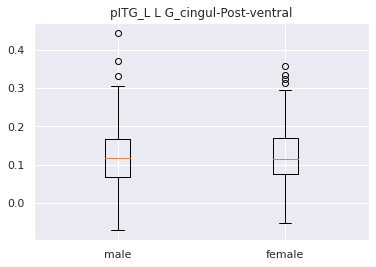

Ttest_indResult(statistic=0.0032246372189609824, pvalue=0.997428248397062)
male mean : 0.121866316
female mean : 0.121846415


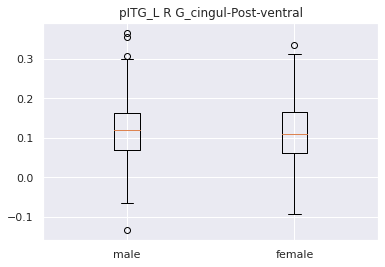

Ttest_indResult(statistic=0.09601695482038536, pvalue=0.9235409730092512)
male mean : 0.11851825
female mean : 0.11792118


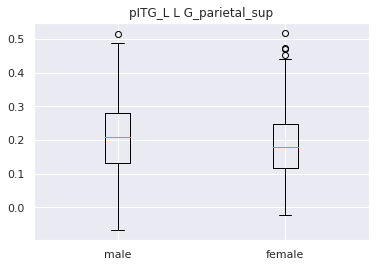

Ttest_indResult(statistic=2.776333935754648, pvalue=0.005678904619509242)
male mean : 0.21009725
female mean : 0.18630977


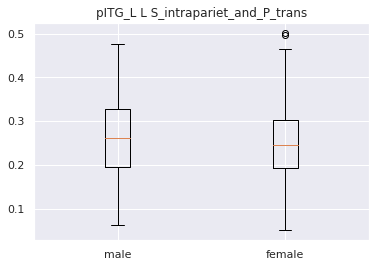

Ttest_indResult(statistic=2.210150284070341, pvalue=0.027492662382419545)
male mean : 0.2640814
female mean : 0.24852245


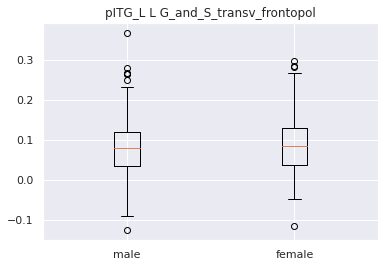

Ttest_indResult(statistic=-0.7998487955908873, pvalue=0.42413278500505813)
male mean : 0.083293684
female mean : 0.08794802


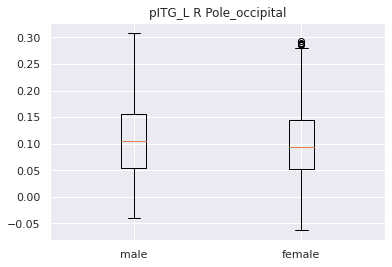

Ttest_indResult(statistic=1.39165171012916, pvalue=0.1645726291539082)
male mean : 0.11096361
female mean : 0.10281154


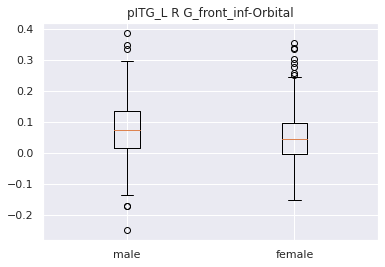

Ttest_indResult(statistic=2.7209463141557952, pvalue=0.006709080081535358)
male mean : 0.07330693
female mean : 0.052528843


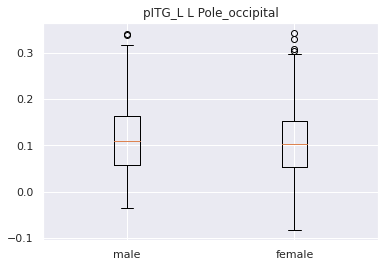

Ttest_indResult(statistic=1.2751197640641383, pvalue=0.2027881653656923)
male mean : 0.11626018
female mean : 0.10826992


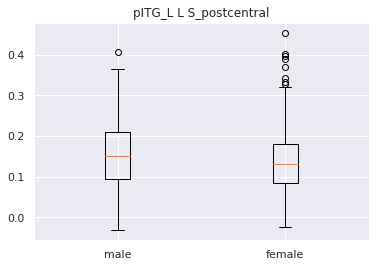

Ttest_indResult(statistic=2.5890681056057545, pvalue=0.009870223882467003)
male mean : 0.15819883
female mean : 0.14057475


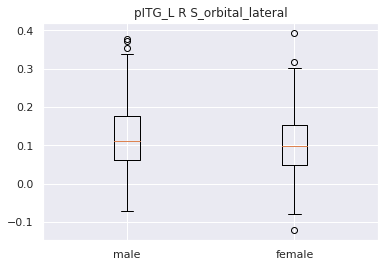

Ttest_indResult(statistic=2.495971670981116, pvalue=0.012843712198704553)
male mean : 0.11944816
female mean : 0.10241498


In [155]:
rois = ["pITG_L"] # modified to rois of interest
ROIs = regionsOfInterest(data_results_logi["acc_test"], pvalue_logi, moyenne_logi, rois, label, run_logi)
bestRegion(ROIs)

## Best region for pITG_R

     coefficient    seed                   labels
20      0.116365  pITG_R  L G_oc-temp_lat-fusifor
41      0.096079  pITG_R         L Pole_occipital
83      0.093142  pITG_R  R G_cingul-Post-ventral
125     0.089565  pITG_R            R S_front_inf
84      0.079409  pITG_R               R G_cuneus
9       0.071207  pITG_R  L G_cingul-Post-ventral
59      0.070110  pITG_R          L S_oc-temp_lat
21      0.067775  pITG_R  L G_oc-temp_med-Lingual
115     0.062380  pITG_R         R Pole_occipital
66      0.062090  pITG_R          L S_postcentral
The mean accuracy : 0.7271796460176991
The standard deviation of the accuracy : 0.04261735609637595
The lower boundry of the confidance interval of the accuracy : 0.6436496280688022
The upper boundry of the confidance interval of the accuracy : 0.810709663966596


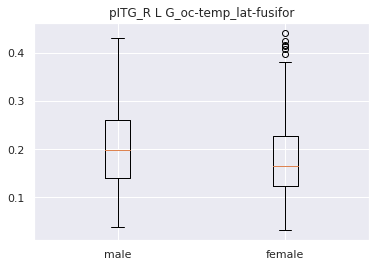

Ttest_indResult(statistic=3.2774844460194017, pvalue=0.0011113279198056616)
male mean : 0.20170005
female mean : 0.17975447


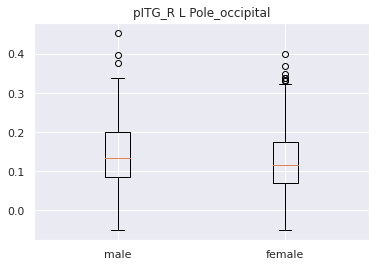

Ttest_indResult(statistic=2.1544399741091187, pvalue=0.03162548851303502)
male mean : 0.14234442
female mean : 0.12738003


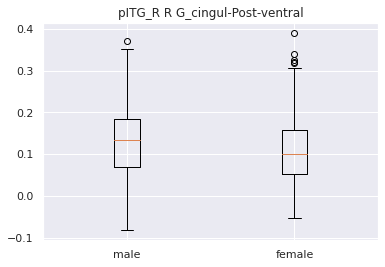

Ttest_indResult(statistic=2.7984808337835725, pvalue=0.0053086933505674845)
male mean : 0.1303599
female mean : 0.110936716


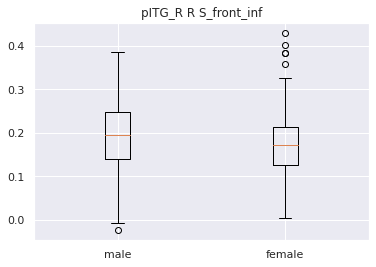

Ttest_indResult(statistic=3.5885077171556365, pvalue=0.0003613019486017472)
male mean : 0.19545709
female mean : 0.17458448


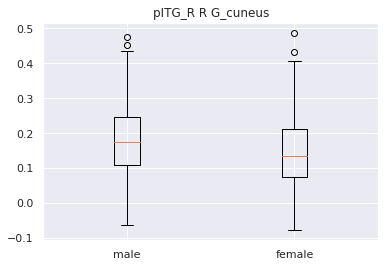

Ttest_indResult(statistic=3.905515094980048, pvalue=0.00010533315735719154)
male mean : 0.18062297
female mean : 0.14835264


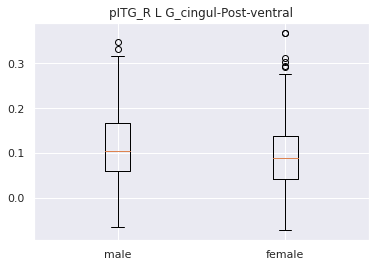

Ttest_indResult(statistic=2.8713090107584436, pvalue=0.004240238016901831)
male mean : 0.11182308
female mean : 0.092711404


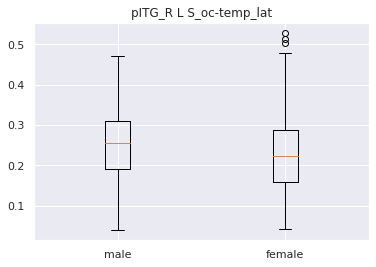

Ttest_indResult(statistic=3.5098086157758033, pvalue=0.0004839877452465248)
male mean : 0.2529133
female mean : 0.22639872


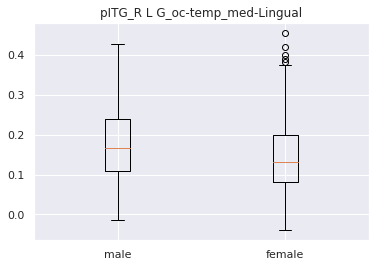

Ttest_indResult(statistic=4.202136263805384, pvalue=3.070337181756022e-05)
male mean : 0.17783917
female mean : 0.1470981


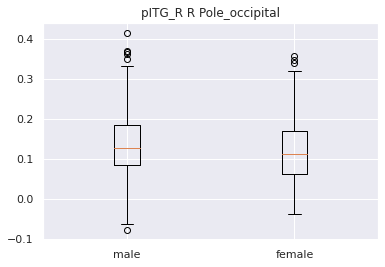

Ttest_indResult(statistic=2.708058425442263, pvalue=0.006971735137557166)
male mean : 0.13952155
female mean : 0.12151752


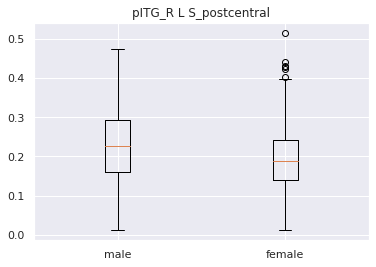

Ttest_indResult(statistic=4.500613935739143, pvalue=8.223189970303467e-06)
male mean : 0.22811967
female mean : 0.19511805


In [157]:
rois = ["pITG_R"] # modified to rois of interest
ROIs = regionsOfInterest(data_results_logi["acc_test"], pvalue_logi, moyenne_logi, rois, label, run_logi)
bestRegion(ROIs)

## Best region for planumtemp_L

     coefficient          seed                       labels
60      0.109682  planumtemp_L  L S_oc-temp_med_and_Lingual
20      0.106381  planumtemp_L      L G_oc-temp_lat-fusifor
43      0.102335  planumtemp_L                L S_calcarine
21      0.101442  planumtemp_L      L G_oc-temp_med-Lingual
124     0.100413  planumtemp_L       R S_collat_transv_post
94      0.094914  planumtemp_L      R G_oc-temp_lat-fusifor
95      0.078575  planumtemp_L      R G_oc-temp_med-Lingual
50      0.073690  planumtemp_L       L S_collat_transv_post
84      0.067802  planumtemp_L                   R G_cuneus
16      0.066221  planumtemp_L    L G_Ins_lg_and_S_cent_ins
The mean accuracy : 0.7298070796460177
The standard deviation of the accuracy : 0.04224918968796545
The lower boundry of the confidance interval of the accuracy : 0.6469986678576054
The upper boundry of the confidance interval of the accuracy : 0.8126154914344299


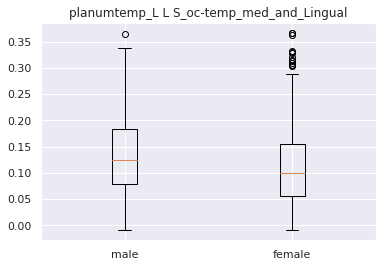

Ttest_indResult(statistic=3.020211908506582, pvalue=0.002639537757200332)
male mean : 0.13396002
female mean : 0.11491338


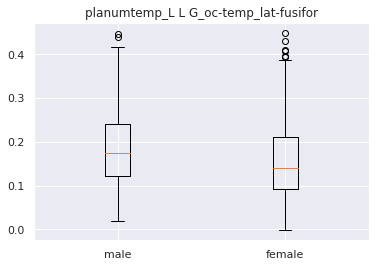

Ttest_indResult(statistic=3.884599647610934, pvalue=0.00011456706619806536)
male mean : 0.18645073
female mean : 0.1582872


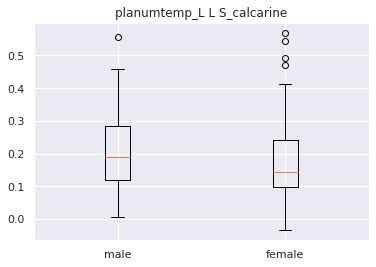

Ttest_indResult(statistic=3.6505599712750856, pvalue=0.0002858230530319466)
male mean : 0.20659167
female mean : 0.17391653


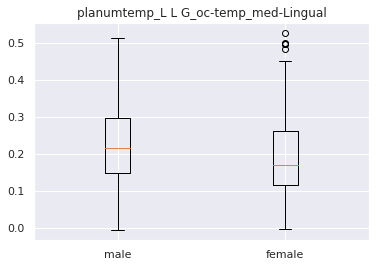

Ttest_indResult(statistic=3.7312157259175804, pvalue=0.00020971058206866478)
male mean : 0.22793445
female mean : 0.1945707


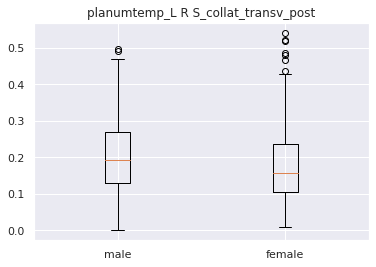

Ttest_indResult(statistic=2.8078444407827665, pvalue=0.0051588520422414215)
male mean : 0.20265692
female mean : 0.17838421


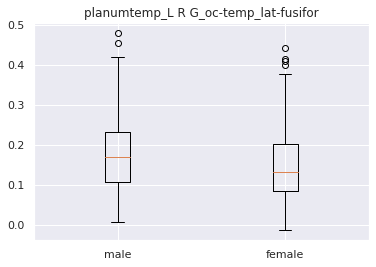

Ttest_indResult(statistic=3.844351881138195, pvalue=0.000134530254843104)
male mean : 0.17783996
female mean : 0.14997594


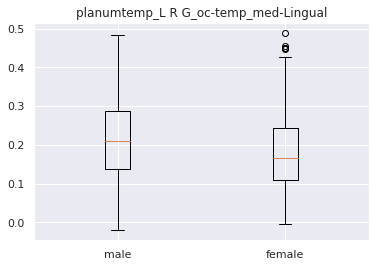

Ttest_indResult(statistic=3.9401536556181798, pvalue=9.157157832593854e-05)
male mean : 0.21691808
female mean : 0.18325616


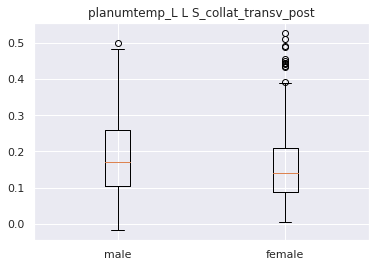

Ttest_indResult(statistic=3.0011479430352437, pvalue=0.0028077474666258415)
male mean : 0.18676466
female mean : 0.16102566


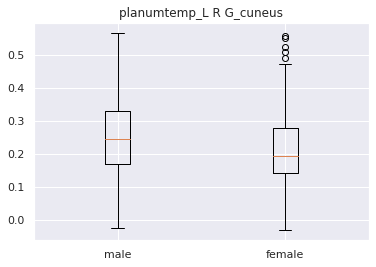

Ttest_indResult(statistic=3.786412691483393, pvalue=0.000169108074810519)
male mean : 0.25222728
female mean : 0.21697903


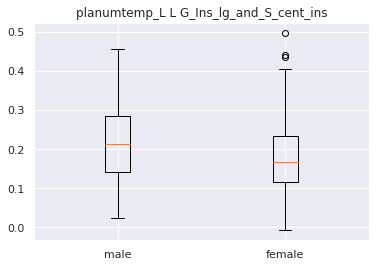

Ttest_indResult(statistic=4.7473737697537555, pvalue=2.611760766602863e-06)
male mean : 0.21818782
female mean : 0.18234089


In [159]:
rois = ["planumtemp_L"] # modified to rois of interest
ROIs = regionsOfInterest(data_results_logi["acc_test"], pvalue_logi, moyenne_logi, rois, label, run_logi)
bestRegion(ROIs)

## Best region for planumtemp_R

     coefficient          seed                       labels
43      0.109145  planumtemp_R                L S_calcarine
72      0.095892  planumtemp_R             L S_temporal_sup
60      0.094791  planumtemp_R  L S_oc-temp_med_and_Lingual
20      0.082885  planumtemp_R      L G_oc-temp_lat-fusifor
47      0.072129  planumtemp_R      L S_circular_insula_inf
21      0.069142  planumtemp_R      L G_oc-temp_med-Lingual
94      0.068069  planumtemp_R      R G_oc-temp_lat-fusifor
121     0.065162  planumtemp_R      R S_circular_insula_inf
108     0.062114  planumtemp_R      R G_temp_sup-Plan_polar
78      0.061713  planumtemp_R   R G_and_S_transv_frontopol
The mean accuracy : 0.7170070796460177
The standard deviation of the accuracy : 0.042554433922956256
The lower boundry of the confidance interval of the accuracy : 0.6336003891570234
The upper boundry of the confidance interval of the accuracy : 0.800413770135012


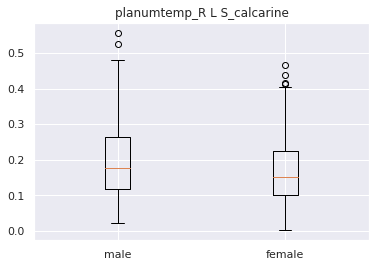

Ttest_indResult(statistic=3.1724387321603484, pvalue=0.0015932969773334883)
male mean : 0.19657883
female mean : 0.1700965


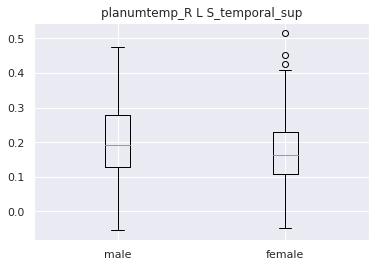

Ttest_indResult(statistic=3.61097793210399, pvalue=0.000332036608740878)
male mean : 0.20394091
female mean : 0.1741676


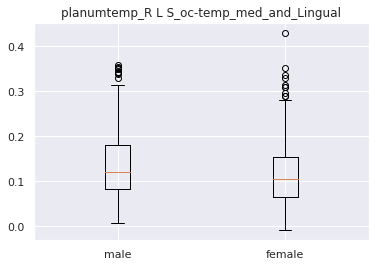

Ttest_indResult(statistic=3.0624233052403027, pvalue=0.00229945814708059)
male mean : 0.13526098
female mean : 0.116651125


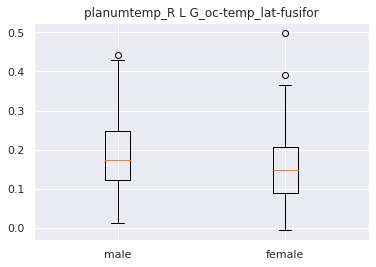

Ttest_indResult(statistic=4.196349599946236, pvalue=3.147371906718927e-05)
male mean : 0.18705179
female mean : 0.15669796


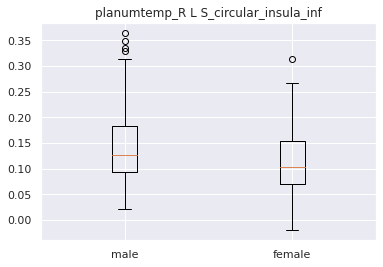

Ttest_indResult(statistic=5.007456260267843, pvalue=7.371794588395764e-07)
male mean : 0.14035343
female mean : 0.11432696


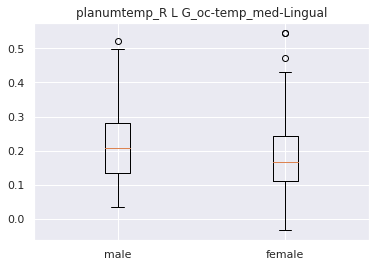

Ttest_indResult(statistic=4.142846816078422, pvalue=3.9523455590138634e-05)
male mean : 0.21708734
female mean : 0.18176907


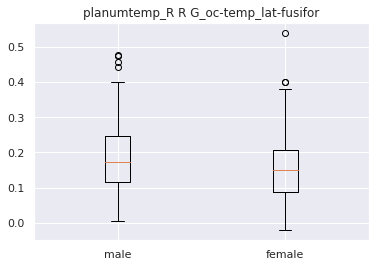

Ttest_indResult(statistic=4.001262735967014, pvalue=7.134805052761894e-05)
male mean : 0.18411116
female mean : 0.15461634


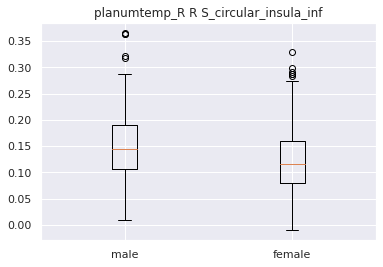

Ttest_indResult(statistic=5.1698335247619145, pvalue=3.2510555654335486e-07)
male mean : 0.15255034
female mean : 0.12557979


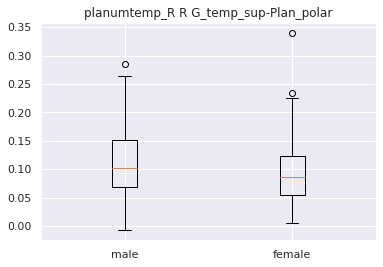

Ttest_indResult(statistic=3.672343154381283, pvalue=0.0002630403504360859)
male mean : 0.111256644
female mean : 0.09470312


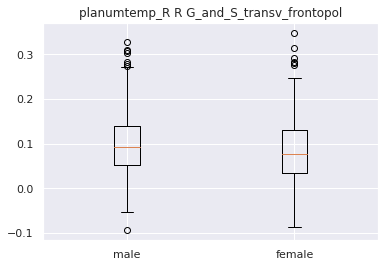

Ttest_indResult(statistic=2.4450835297243194, pvalue=0.014784556396720787)
male mean : 0.09999801
female mean : 0.084834725


In [161]:
rois = ["planumtemp_R"] # modified to rois of interest
ROIs = regionsOfInterest(data_results_logi["acc_test"], pvalue_logi, moyenne_logi, rois, label, run_logi)
bestRegion(ROIs)

## Best region for all seed left

     coefficient     seed                      labels
394     0.128692   aMTG_L      R G_pariet_inf-Angular
349     0.100982   aMTG_L               L S_front_sup
300     0.092799   aMTG_L  L G_and_S_transv_frontopol
453     0.085000   pITG_L     L G_cingul-Post-ventral
374     0.082559   aMTG_L  R G_and_S_transv_frontopol
408     0.079315   aMTG_L      R Lat_Fis-ant-Horizont
41      0.076981  opIFG_L            L Pole_occipital
431     0.076852   aMTG_L         R S_orbital_lateral
527     0.076444   pITG_L     R G_cingul-Post-ventral
448     0.072345   pITG_L  L G_and_S_transv_frontopol
The mean accuracy : 0.85109203539823
The standard deviation of the accuracy : 0.03469989531321699
The lower boundry of the confidance interval of the accuracy : 0.7830802405843247
The upper boundry of the confidance interval of the accuracy : 0.9191038302121353


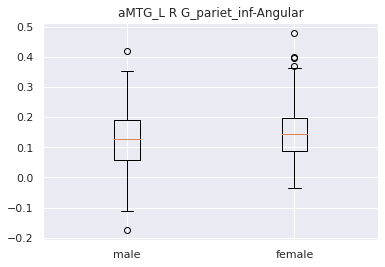

Ttest_indResult(statistic=-2.9146205621255152, pvalue=0.0037015700856202847)
male mean : 0.12457278
female mean : 0.1470128


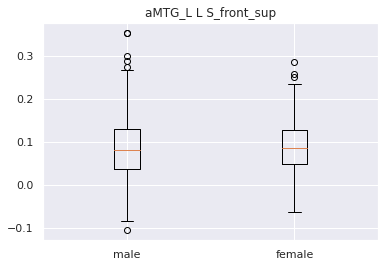

Ttest_indResult(statistic=-0.16306014602567942, pvalue=0.8705290755176053)
male mean : 0.08941226
female mean : 0.09030944


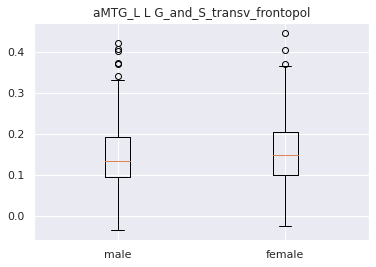

Ttest_indResult(statistic=-0.4347863501222379, pvalue=0.6638826498992696)
male mean : 0.15048955
female mean : 0.15334298


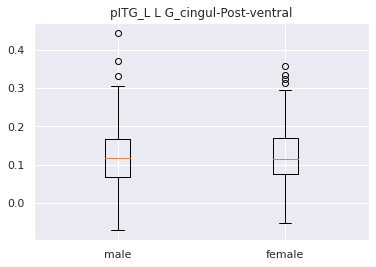

Ttest_indResult(statistic=0.0032246372189609824, pvalue=0.997428248397062)
male mean : 0.121866316
female mean : 0.121846415


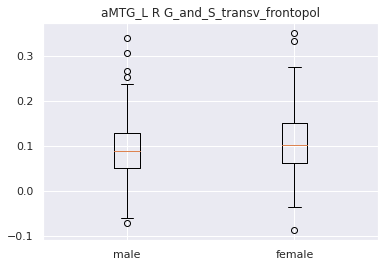

Ttest_indResult(statistic=-2.571148551614975, pvalue=0.010389553654298302)
male mean : 0.09560566
female mean : 0.10965275


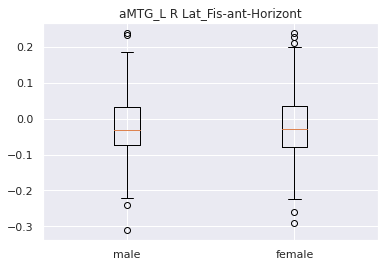

Ttest_indResult(statistic=0.12007247790545271, pvalue=0.9044681925613891)
male mean : -0.022705056
female mean : -0.023588676


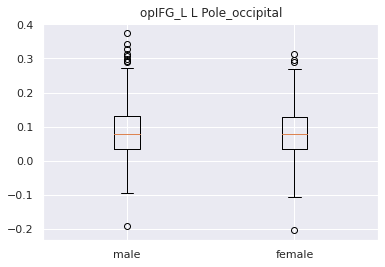

Ttest_indResult(statistic=1.0227015449858845, pvalue=0.30688434881270166)
male mean : 0.08923399
female mean : 0.08254886


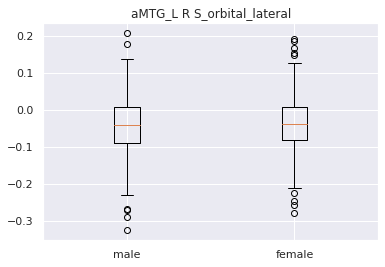

Ttest_indResult(statistic=-1.292465867685566, pvalue=0.1967213906190116)
male mean : -0.042981237
female mean : -0.034570992


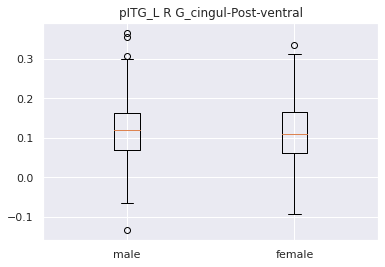

Ttest_indResult(statistic=0.09601695482038536, pvalue=0.9235409730092512)
male mean : 0.11851825
female mean : 0.11792118


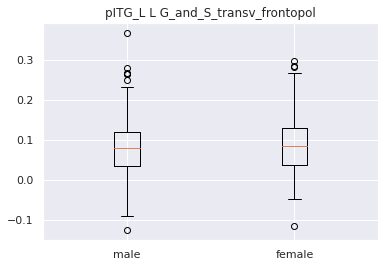

Ttest_indResult(statistic=-0.7998487955908873, pvalue=0.42413278500505813)
male mean : 0.083293684
female mean : 0.08794802


In [163]:
rois = ["opIFG_L", "planumtemp_L", "aMTG_L", "pITG_L"] # modified to rois of interest
ROIs = regionsOfInterest(data_results_logi["acc_test"], pvalue_logi, moyenne_logi, rois, label, run_logi)
bestRegion(ROIs)

## Best region for all seed right

     coefficient          seed                      labels
349     0.088181        aMTG_R               L S_front_sup
464     0.082823        pITG_R     L G_oc-temp_lat-fusifor
423     0.079728        aMTG_R               R S_front_sup
485     0.078090        pITG_R            L Pole_occipital
569     0.077108        pITG_R               R S_front_inf
431     0.076072        aMTG_R         R S_orbital_lateral
191     0.074937  planumtemp_R               L S_calcarine
300     0.073700        aMTG_R  L G_and_S_transv_frontopol
374     0.069628        aMTG_R  R G_and_S_transv_frontopol
220     0.067752  planumtemp_R            L S_temporal_sup
The mean accuracy : 0.8264513274336283
The standard deviation of the accuracy : 0.03755704565435549
The lower boundry of the confidance interval of the accuracy : 0.7528395179510915
The upper boundry of the confidance interval of the accuracy : 0.900063136916165


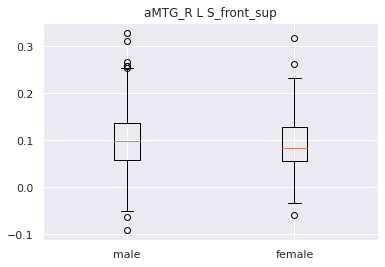

Ttest_indResult(statistic=1.3124199191098709, pvalue=0.1899085676690528)
male mean : 0.09976947
female mean : 0.0929379


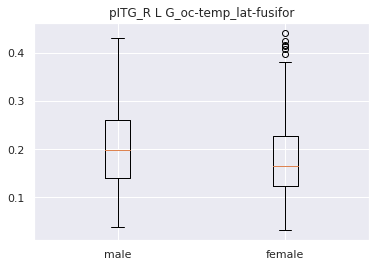

Ttest_indResult(statistic=3.2774844460194017, pvalue=0.0011113279198056616)
male mean : 0.20170005
female mean : 0.17975447


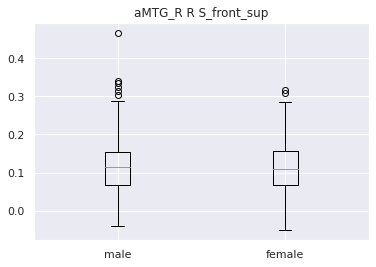

Ttest_indResult(statistic=0.35699531800332124, pvalue=0.7212279003781157)
male mean : 0.116820656
female mean : 0.11475391


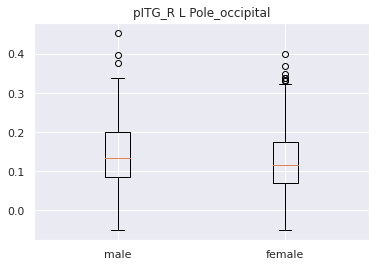

Ttest_indResult(statistic=2.1544399741091187, pvalue=0.03162548851303502)
male mean : 0.14234442
female mean : 0.12738003


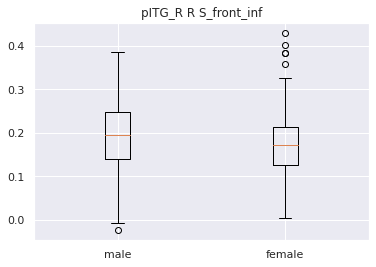

Ttest_indResult(statistic=3.5885077171556365, pvalue=0.0003613019486017472)
male mean : 0.19545709
female mean : 0.17458448


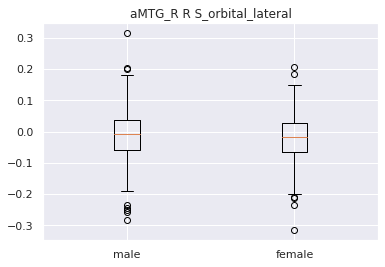

Ttest_indResult(statistic=0.8920637158306071, pvalue=0.37273653091063785)
male mean : -0.010003094
female mean : -0.016048837


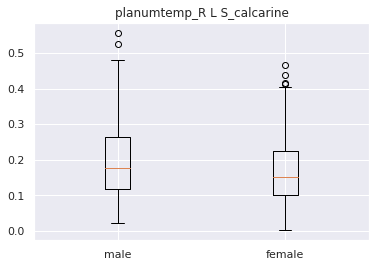

Ttest_indResult(statistic=3.1724387321603484, pvalue=0.0015932969773334883)
male mean : 0.19657883
female mean : 0.1700965


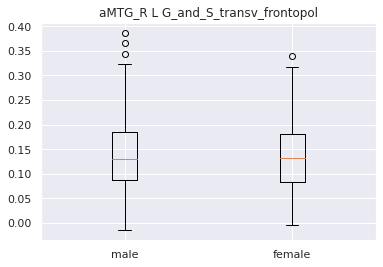

Ttest_indResult(statistic=0.6162901616659396, pvalue=0.5379499355179367)
male mean : 0.14077756
female mean : 0.13714556


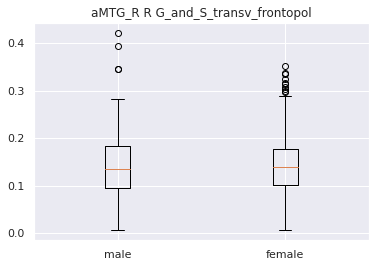

Ttest_indResult(statistic=-0.5021313679136576, pvalue=0.615769711298541)
male mean : 0.14287779
female mean : 0.14569084


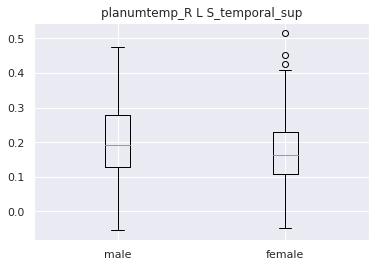

Ttest_indResult(statistic=3.61097793210399, pvalue=0.000332036608740878)
male mean : 0.20394091
female mean : 0.1741676


In [165]:
rois = ["opIFG_R", "planumtemp_R", "aMTG_R", "pITG_R"] # modified to rois of interest
ROIs = regionsOfInterest(data_results_logi["acc_test"], pvalue_logi, moyenne_logi, rois, label, run_logi)
bestRegion(ROIs)